# Statistics: Example of using the jackknife method to determine the bias and standard error of an estimator of a distribution

Jackknifing is a method that can be used to estimate the accuracy of an estimator of a distribution and any potential bias. It refers to any method that relies on random sampling with replacement. For example, the estimator that you are interested in could be the mean of a distribution. Jackknifing allows us to calculate the uncertainty on that mean and to get an estimate of the bias. There is a lot of online information about this, what follows is just a simple example where we generate N events from a Gaussian distribution with mean $\mu$ and width $\sigma$ and use jackknifing to get the uncertainty on the mean.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif', size=80)
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 8, 8

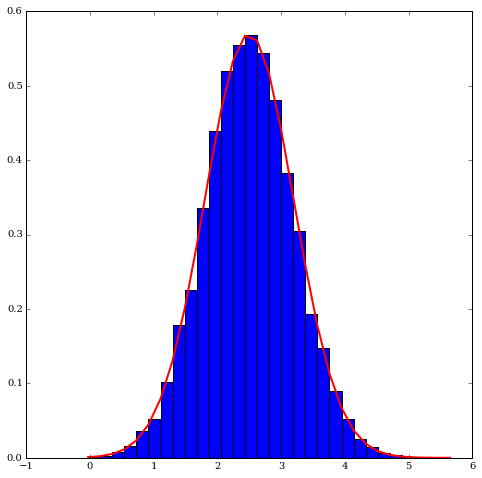

In [83]:
mu, sigma = 2.5, 0.7 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

Now compute the mean and standard deviation for this sample, these are estimators of the real underlying distribution.

In [84]:
mean = np.mean(s)
std_dev = np.std(s)

Define the jackknife method to compute the uncertainty on these quantities. There are 10000 datapoints in the dataset, so the jackknife creates 10000 new datasets where, in each one, one element has been removed.

In [96]:
def jackknife( s, f ):
    """f is the function that computes the estimator of interest
    """
    N = len(s)
    estimator_all = f(s)
    estimator_jk_mean = 0.
    variance = 0.
    for i in range(N):
        new_s = np.concatenate((s[:i], s[i+1:])) # remove element i from the dataset
        estimator_jk = f(new_s) # compute the estimate for this reduced dataset
        estimator_jk_mean += estimator_jk
        variance += ( estimator_all - estimator_jk )**2 
    variance = (N-1)/float(N) * variance
    bias = (N-1)*(estimator_jk_mean/float(N) - estimator_all)
    return variance, bias

In [97]:
std_dev_variance, std_dev_bias = jackknife( s, np.std  )
mean_variance, mean_bias       = jackknife( s, np.mean )

So the final mean and standard deviation of the Gaussian of 10000 events are

In [101]:
print "mean = %0.3f +- %0.6f" % (mean, np.sqrt(mean_variance))
print "std dev = %0.3f +- %0.6f" % (std_dev, np.sqrt(std_dev_variance))

mean = 2.498 +- 0.006958
std dev = 0.696 +- 0.004962


In [100]:
print "mean bias = %0.6f" % (mean_bias)
print "std dev bias = %0.6f" % (std_dev_bias)

mean bias = 0.000000
std dev bias = -0.000052


There are, of course, simpler ways of computing these quantities in this simplified example, but it demonstrates the method.